# Problem Statement

Delivery_time -> Predict delivery time using sorting time

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Read Data
df = pd.read_csv('Downloads/delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
#Data Description
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
#Correlation Analysis

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

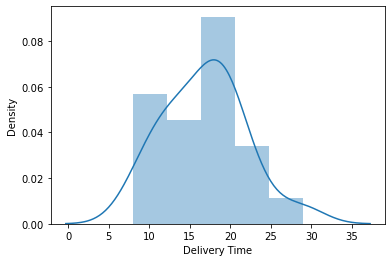

In [6]:
sns.distplot(df['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

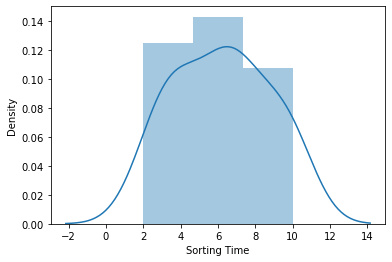

In [6]:
sns.distplot(df['Sorting Time'])

In [7]:
df['Sorting Time'].skew()

0.047115474210530174

In [8]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:>

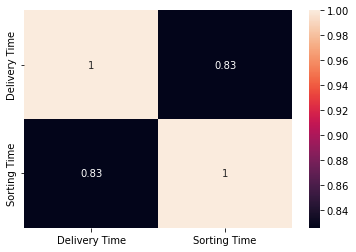

In [9]:
sns.heatmap(df.corr(), annot=True)

In [10]:
# Renaming Columns
df=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [11]:
#import statsmodel

In [11]:
import statsmodels.formula.api as smf

In [12]:
model = smf.ols('delivery_time~sorting_time', data=df).fit()

In [14]:
#Model Parameters

In [13]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [14]:
#line equation
x = 250

y =  1.649020*x+6.582734
y

418.837734

In [15]:
#Print values for t value and p value
print(model.tvalues)
print(model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64
Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [16]:
#r2 value
model.rsquared

0.6822714748417231

# Prediction for new Data

In [17]:
df.head(2)

,delivery_time,sorting_time
0,21.0,10
1,13.5,4


In [18]:
newdf = pd.DataFrame({
     'sorting_time' : [20,12,10,9,5,22]
})
newdf
   
    

,sorting_time
0,20
1,12
2,10
3,9
4,5
5,22


In [19]:
model.predict(newdf)

0    39.563132
1    26.370973
2    23.072933
3    21.423913
4    14.827833
5    42.861172
dtype: float64

# Data Transformation

In [20]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

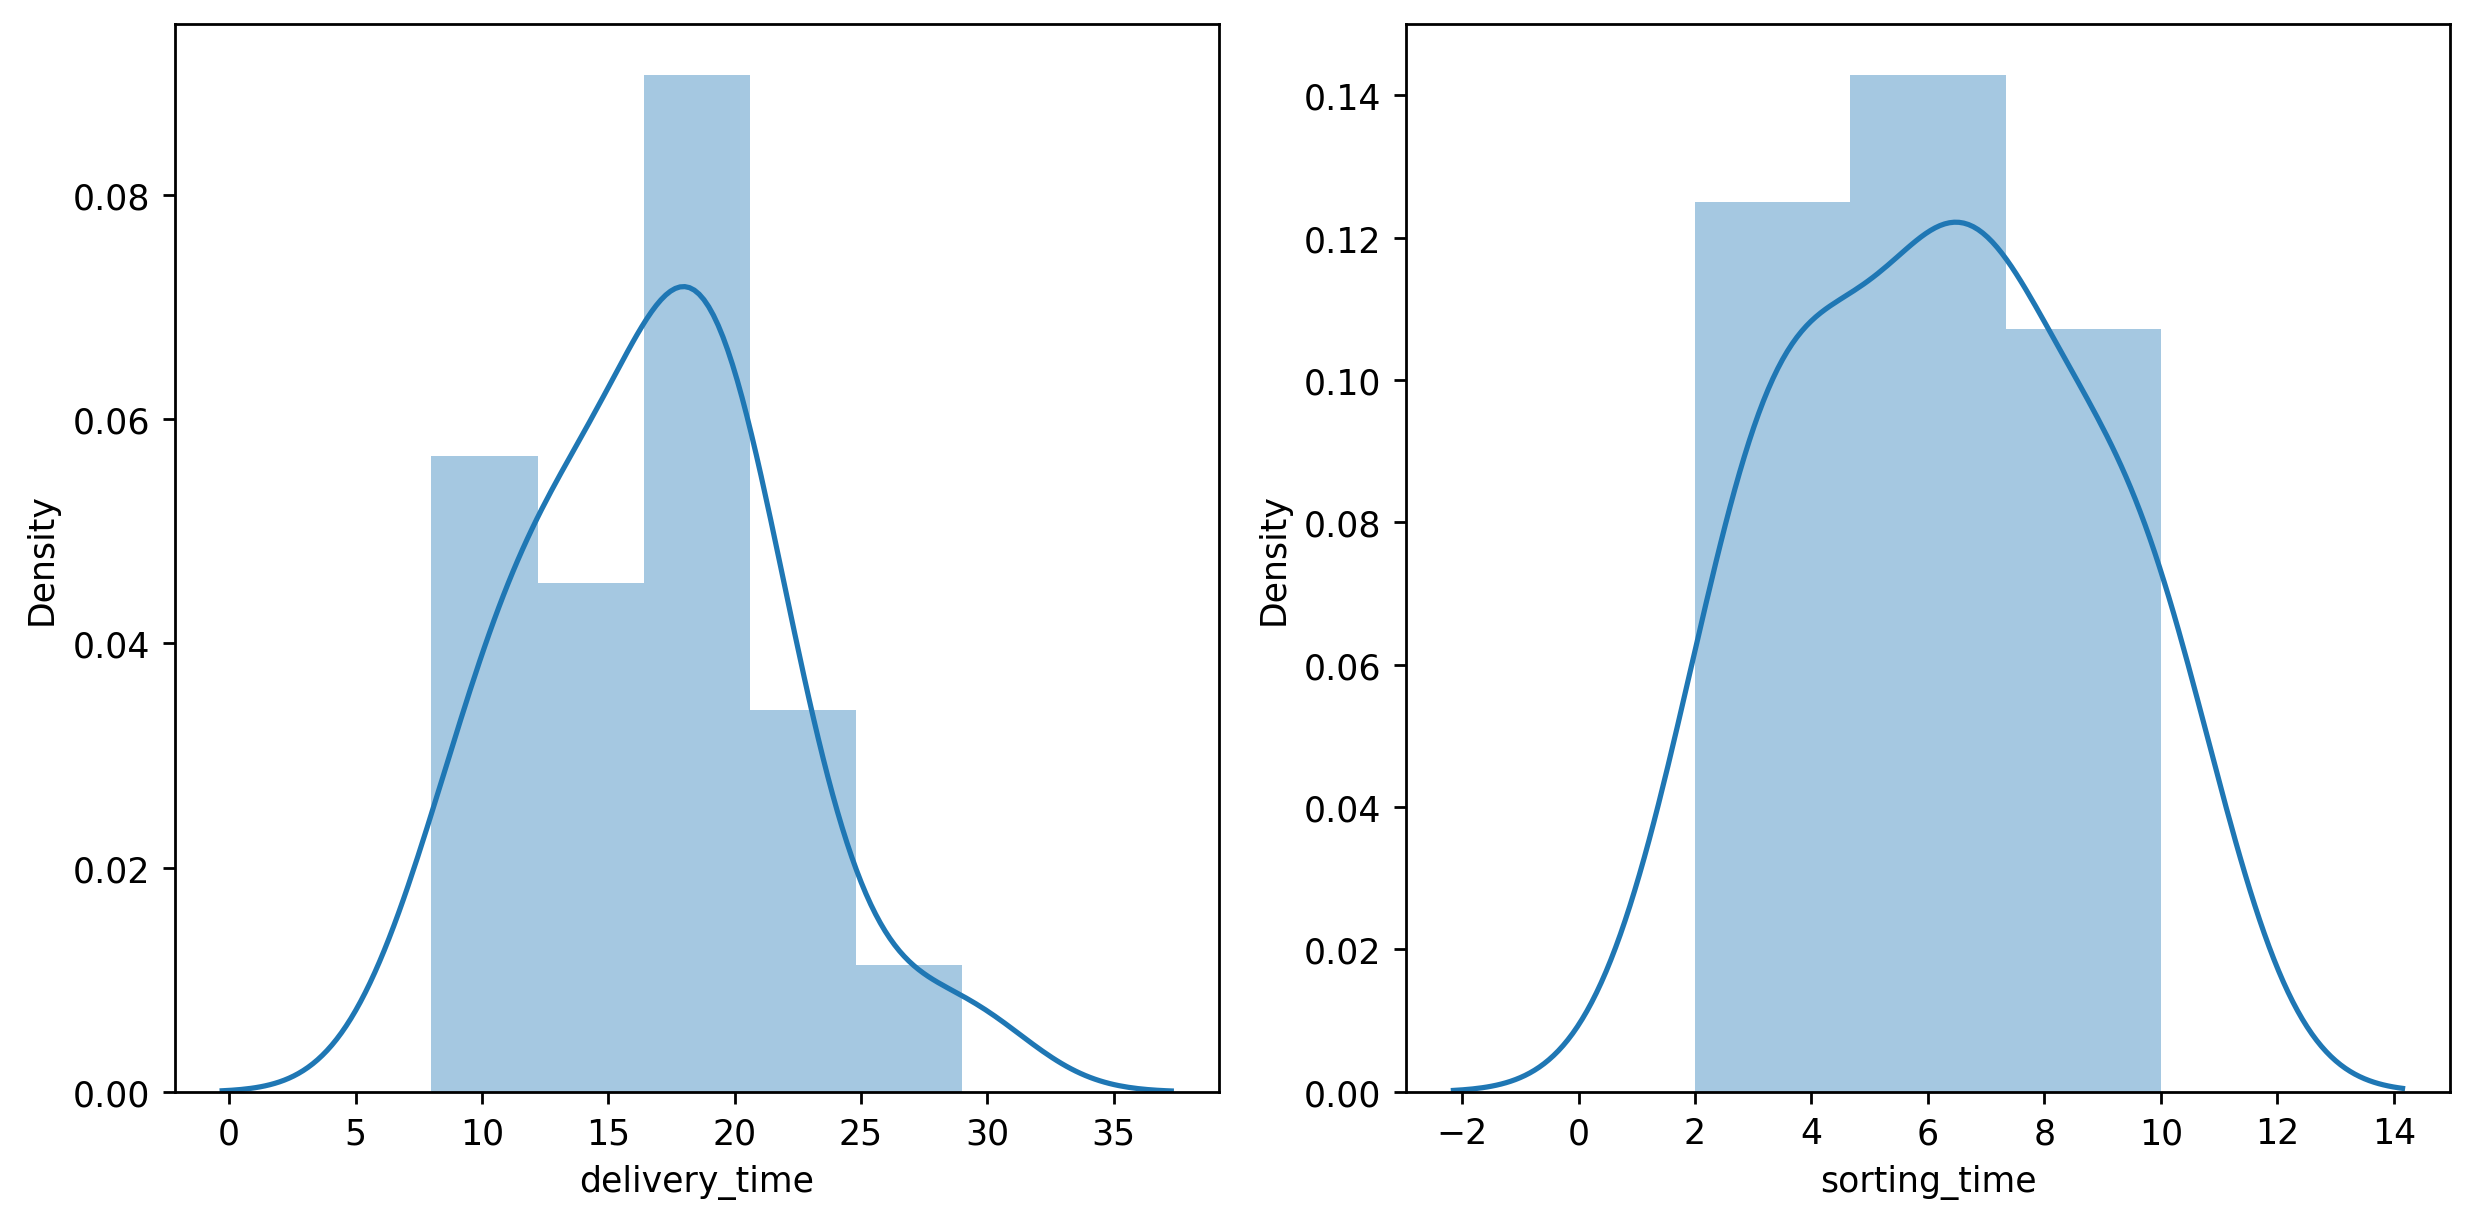

In [21]:
plt.subplot(1,2,1)
sns.distplot(df['delivery_time'])

plt.subplot(1,2,2)
sns.distplot(df['sorting_time'])
plt.tight_layout()

# Log Transformation

In [22]:
df['log_delivery_time'] = np.log(df['delivery_time'])
df.head()

,delivery_time,sorting_time,log_delivery_time
0,21.00,10,3.044522
1,13.50,4,2.602690
2,19.75,6,2.983153
3,24.00,9,3.178054
4,29.00,10,3.367296


In [23]:
df['log_sorting_time'] = np.log(df['sorting_time'])
df.head()

,delivery_time,sorting_time,log_delivery_time,log_sorting_time
0,21.00,10,3.044522,2.302585
1,13.50,4,2.602690,1.386294
2,19.75,6,2.983153,1.791759
3,24.00,9,3.178054,2.197225
4,29.00,10,3.367296,2.302585


<AxesSubplot:xlabel='log_sorting_time', ylabel='Density'>

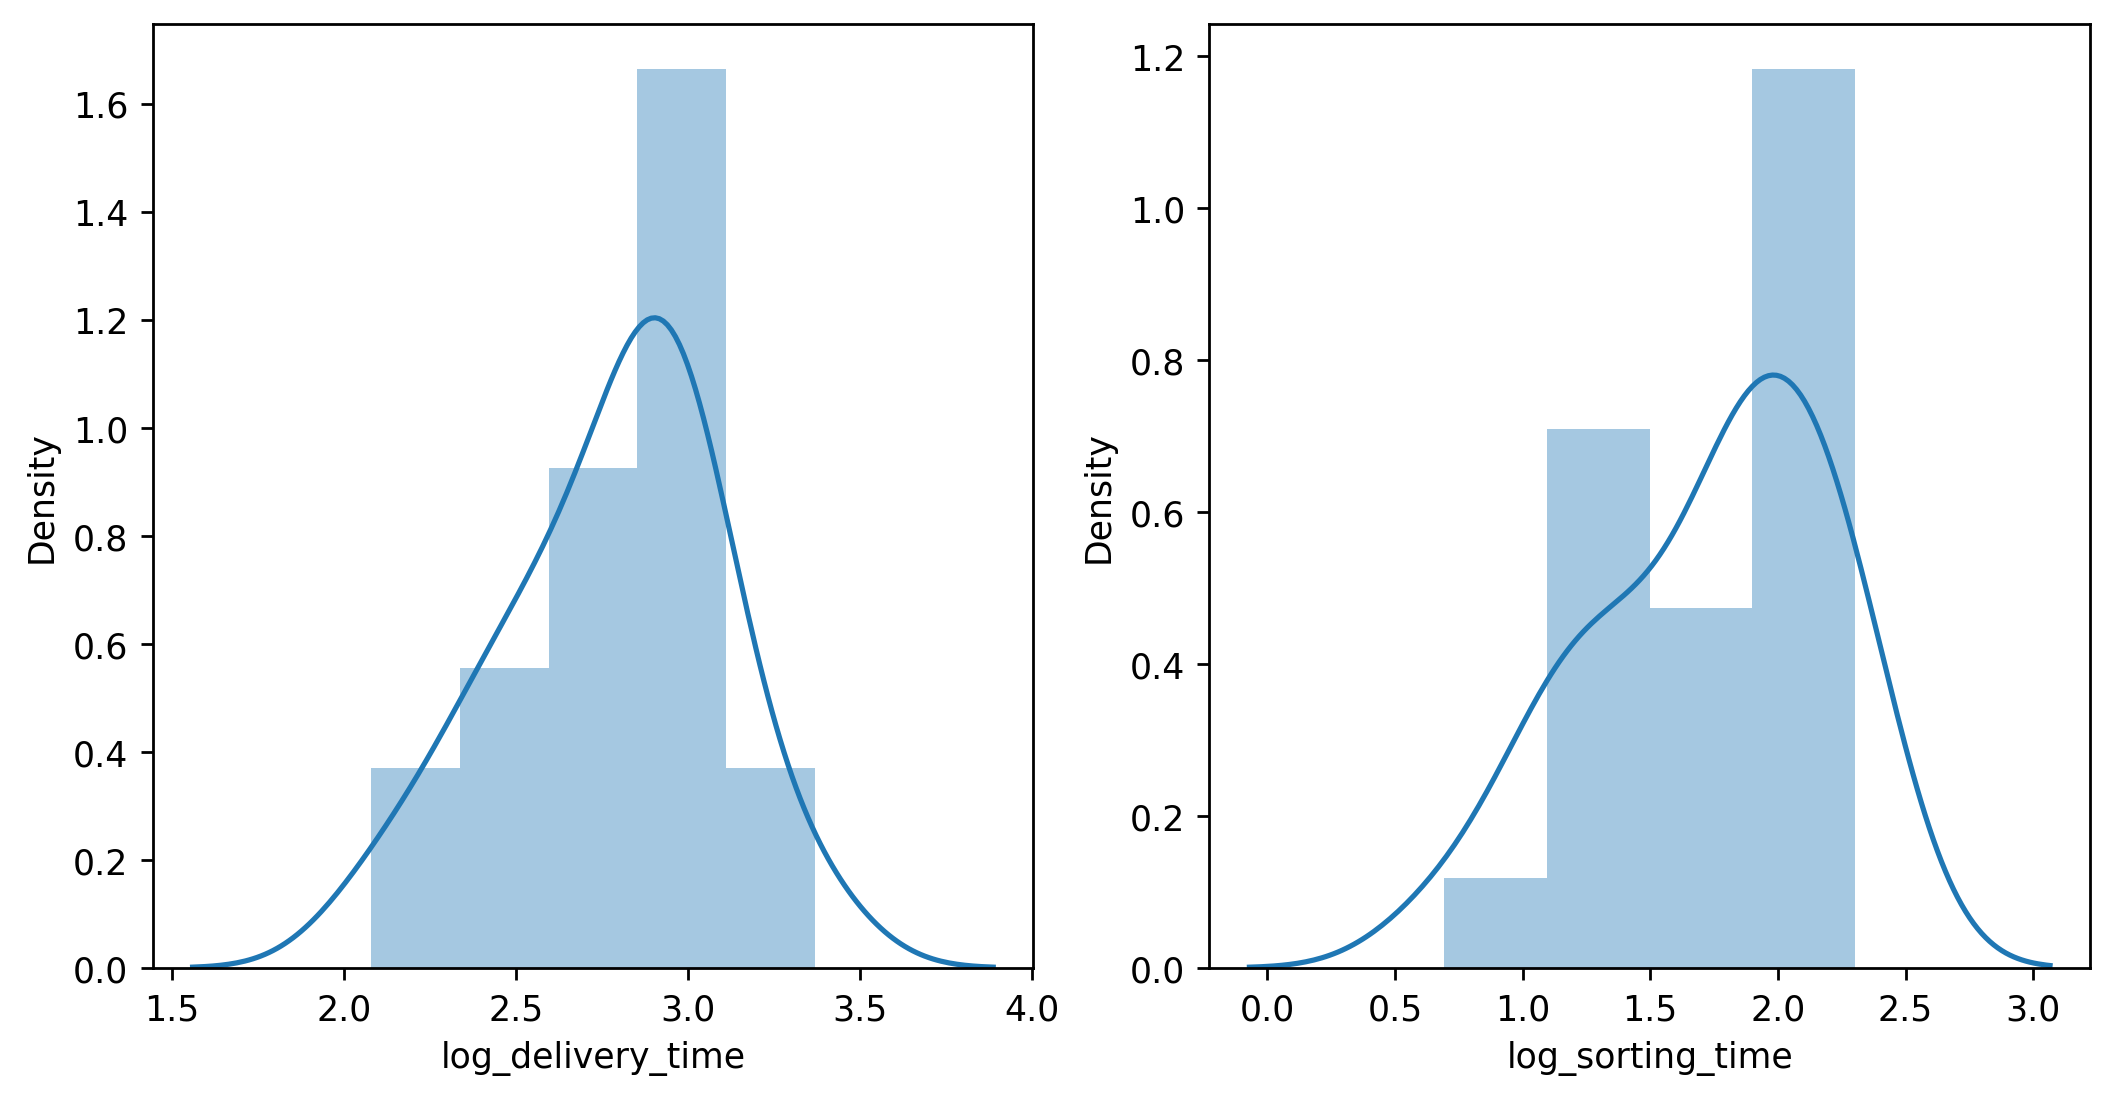

In [26]:
plt.subplot(1,2,1)
sns.distplot(df['log_delivery_time'])

plt.subplot(1,2,2)
sns.distplot(df['log_sorting_time'])

In [27]:
df['log_delivery_time'].skew()

-0.4512901148522999

In [24]:
df['sqrt_sorting_time'] = np.sqrt(df['sorting_time'])
df.head()

,delivery_time,sorting_time,log_delivery_time,log_sorting_time,sqrt_sorting_time
0,21.00,10,3.044522,2.302585,3.162278
1,13.50,4,2.602690,1.386294,2.000000
2,19.75,6,2.983153,1.791759,2.449490
3,24.00,9,3.178054,2.197225,3.000000
4,29.00,10,3.367296,2.302585,3.162278


<AxesSubplot:xlabel='sqrt_sorting_time', ylabel='Density'>

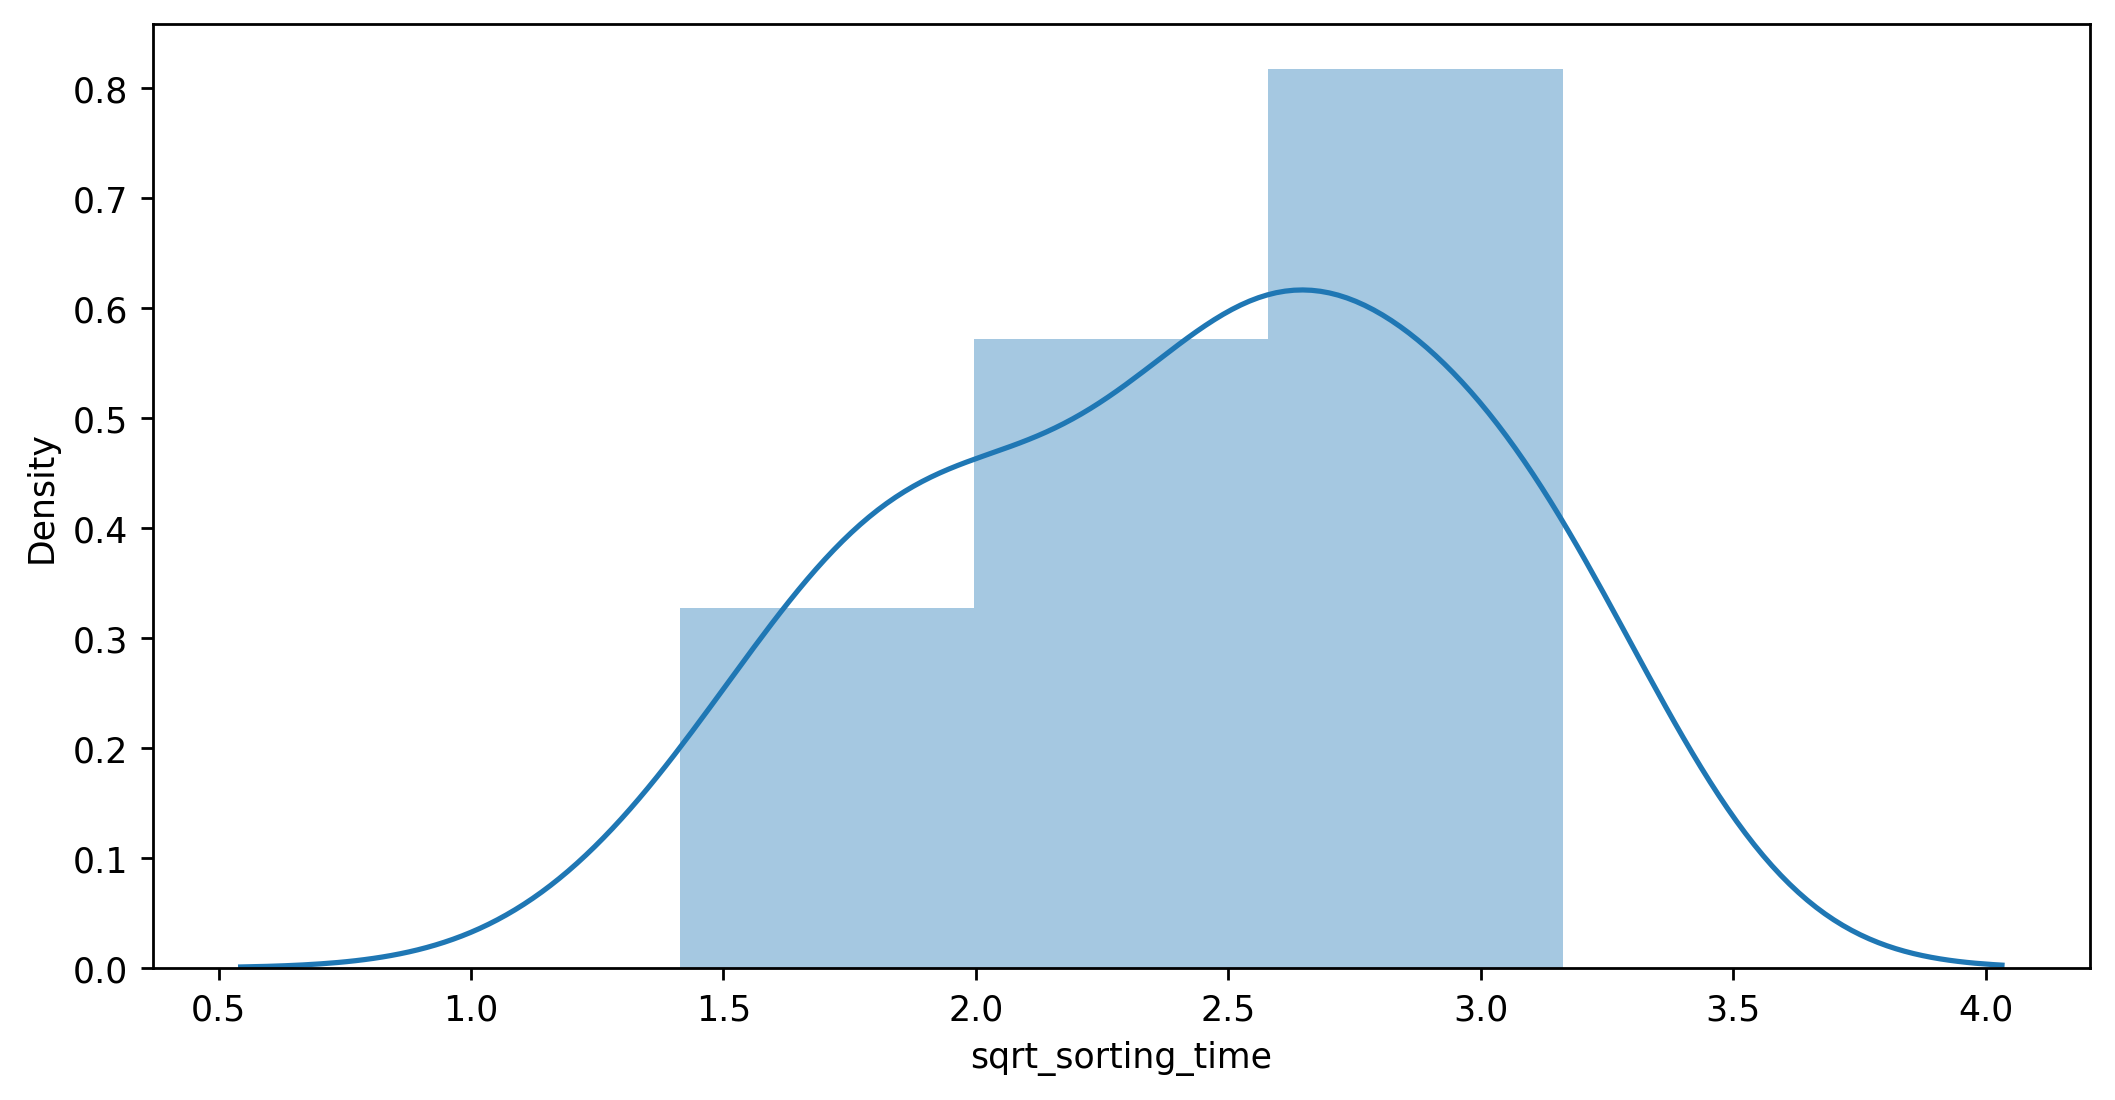

In [25]:
sns.distplot(df['sqrt_sorting_time'])

In [26]:
df['sqrt_sorting_time'].skew()

-0.25981634723613994

# Model Prediction

In [28]:
model.predict(newdf)

0    39.563132
1    26.370973
2    23.072933
3    21.423913
4    14.827833
5    42.861172
dtype: float64

# Exponential Transformation

In [30]:
model2= smf.ols('np.log(delivery_time)~sorting_time', data=df).fit()

In [31]:
#Model Summary

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Fri, 10 Mar 2023   Prob (F-statistic):           1.59e-06
Time:                           12:40:06   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#Model Parameters

model2.params

Intercept       2.121372
sorting_time    0.105552
dtype: float64

In [33]:
#Print values for t value and p value

print(f"t value is\n{model2.tvalues}\nP value is\n {model2.pvalues}")

t value is
Intercept       20.601357
sorting_time     6.836088
dtype: float64
P value is
 Intercept       1.857343e-14
sorting_time    1.592708e-06
dtype: float64


In [34]:
#r^2 value

model2.rsquared, model2.rsquared_adj

(0.7109478980584187, 0.6957346295351776)

# Model Prediction

In [35]:
model2.predict(newdf)

0    4.232404
1    3.387991
2    3.176888
3    3.071336
4    2.649130
5    4.443507
dtype: float64

In [37]:
df['sorting_time_sq']= df.sorting_time*df.sorting_time

In [38]:
model3= smf.ols('delivery_time~sorting_time+sorting_time_sq', data=df).fit()

In [39]:
#Model summary

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           2.39e-05
Time:                        12:45:47   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.5222      4.160      0.847      0.408      -5.217      12.261
sorting_time        2.8130      1.461      1.926      0.070      -0.256       5.882
sorting_time_sq    -0.0932      0.115     -0.810      0.429      -0.335       0.149
==============================================================================
Omnibus:                        5.388   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.393
Skew:                           0.943   Prob(JB):                        0.183
Kurtosis:                       3.563   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#Model parameters

model3.params

Intercept          3.522234
sorting_time       2.813002
sorting_time_sq   -0.093198
dtype: float64

In [41]:
#Print values for t value and p value

print(f"t value is\n{model3.tvalues}\nP value is\n {model3.pvalues}")

t value is
Intercept          0.846756
sorting_time       1.925632
sorting_time_sq   -0.809783
dtype: float64
P value is
 Intercept          0.408248
sorting_time       0.070097
sorting_time_sq    0.428641
dtype: float64


In [42]:
#R squared value

model3.rsquared,model3.rsquared_adj

(0.6934396274520248, 0.6593773638355831)